# Arctic Sea Ice Extent Prediction

Run this notebook to exploratory analysis, model training, and predictions.

⚠️ *Model Training & Forecasting* section may take up to 10 minutes or longer.

In [1]:
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import warnings
warnings.filterwarnings('ignore')

from scripts.ingest import *
from scripts.analysis import *
from scripts.evalmetrics import *
from scripts.models import *

## Ingestion & Cleaning

In [2]:
""" Retrieve Arctic Sea Ice Data from NSIDC """
try:
    df = sie_index_transformer()
except ImportError:
    print('----------------------')
    print('Import ingestion functions.')
    print('----------------------')

Staging path: ../data/staging/arctic_sie_g02135_20231211.xlsx
Reformatted column names: Index(['extent_million_sq_km', 'date'], dtype='object')
Training path: ../data/training/arctic_sie_clean_20231211.csv


## Exploratory Analysis

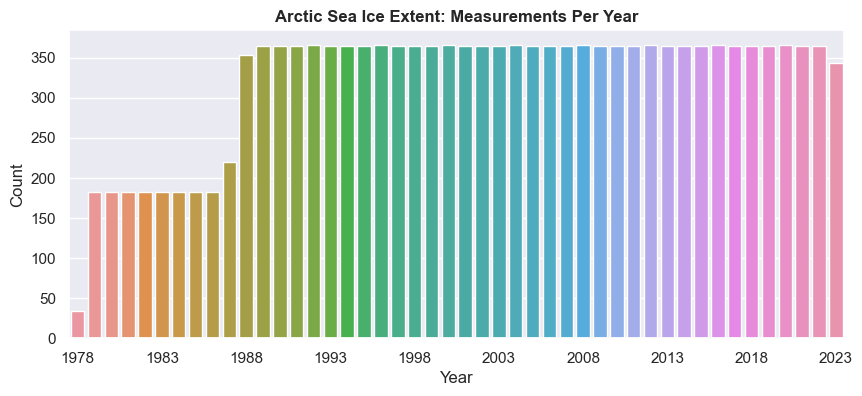

Measurements were taken approximately every 2 days from 1978 to 1987.
From 1988 to 2023, there is a daily measurement recorded, showing the recording frequency was increased two-fold.


In [3]:
""" Analyse sea ice extent measurements per year """
try:
    extent_per_year(df)
except NameError:
    print('----------------------')
    print('df is not defined')
    print('----------------------')

### Stationarity & Seasonality

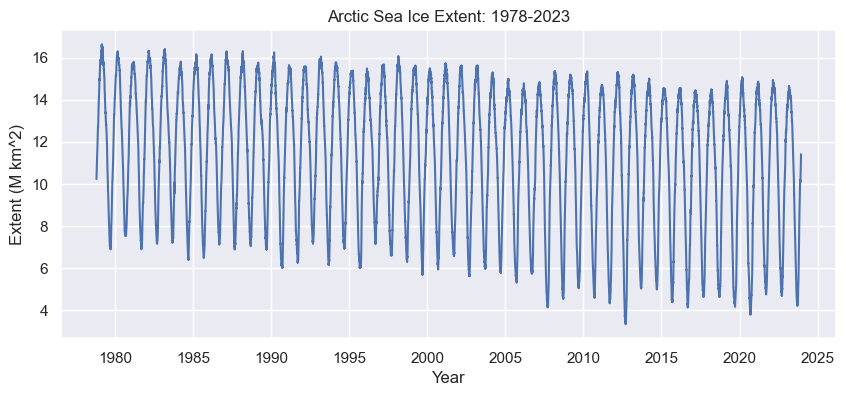

The above set is non-stationary as there are clear annual changes in sea ice extent.


In [4]:
""" Observe seasonality """
try:
    seasonality(df)
except NameError:
    print('----------------------')
    print('df is not defined')
    print('----------------------')

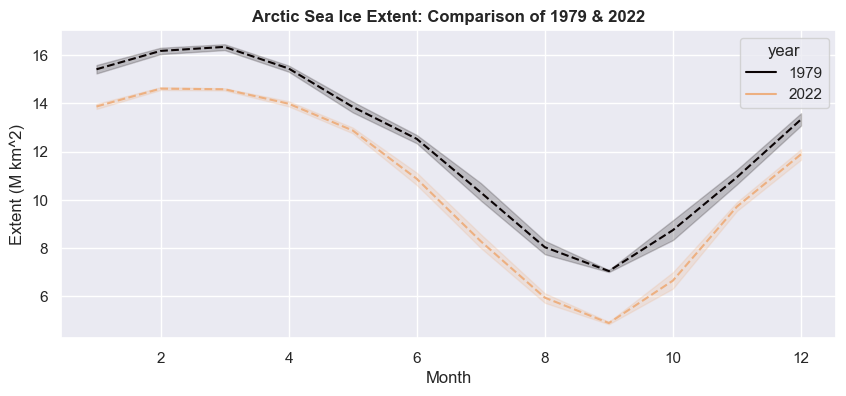

By comparing the first full and final years of the set,
we observe a decrased local maxima and mimina for the months March and September, respectively.
The year 2017 shows an approximate 2 million square kilometer decrease in sea ice extent compared to 1979.


In [5]:
""" Period Start & End Comparison  """
try:
    period_comparison(df)
except NameError:
    print('----------------------')
    print('df is not defined')
    print('----------------------')

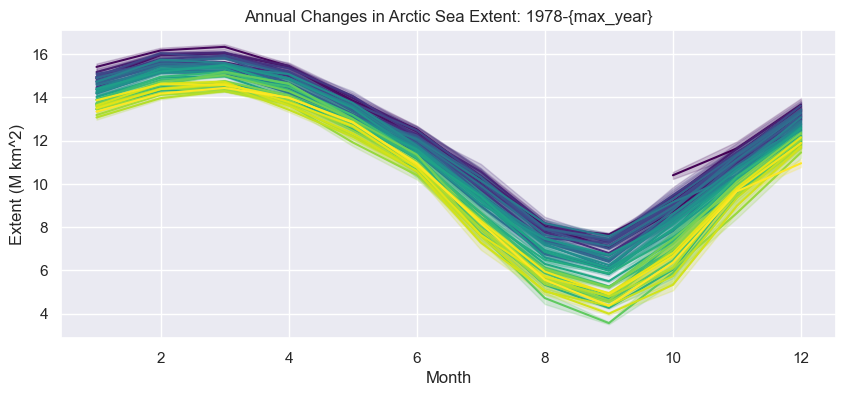

Furthermore, by including each year in the set, we observe a decrease in sea ice extent year-over-year
with darker colors representing older years and shifting to younger years as the colors brighten.


In [6]:
""" Annual Changes """
try:
    annual_changes(df)
except NameError:
    print('----------------------')
    print('df is not defined')
    print('----------------------')

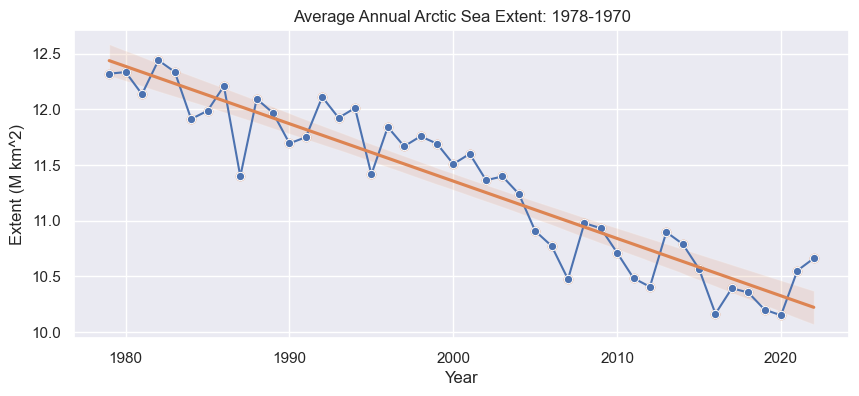

The above chart displays the average annual sea ice extent where there is a clear decreasing linear trend
as we move to more current dates.


In [7]:
""" Average Annual Sea Ice Extent """
try:
    avg_annual_sie(df)
except NameError:
    print('----------------------')
    print('df is not defined')
    print('----------------------')

### Normality Testing

The above box plot shows a median line closer to the 75th Percentile, which indicates a negatively skewed distribution.
Additionally, no outliers are observed beyond the box plot whiskers.


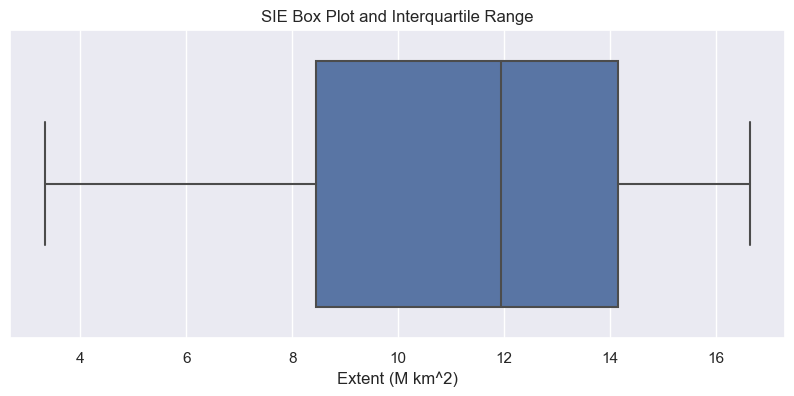

In [8]:
""" Distribution Evaluation: Boxplot """
try:
    # Boxplot
    distribution_eval(df, 'boxplot')
except NameError:
    print('----------------------')
    print('df is not defined')
    print('----------------------')

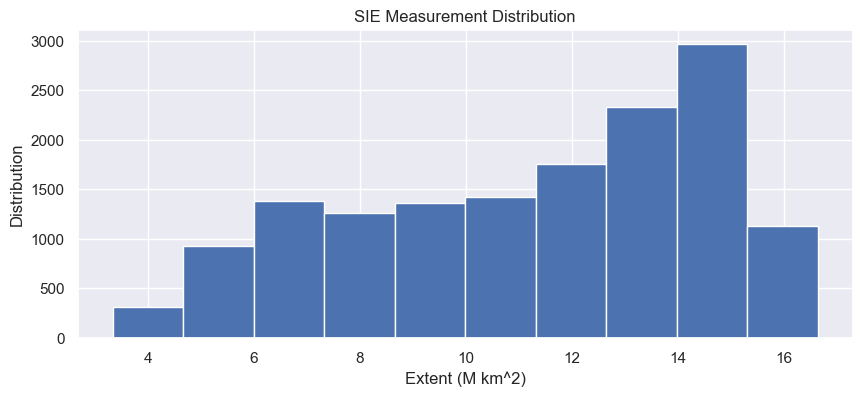

In [9]:
""" Distribution Evaluation: Histogram """
try:
    # Histogram
    distribution_eval(df, 'histogram')
except NameError:
    print('----------------------')
    print('df is not defined')
    print('----------------------')

## Partitioning & Pre-Processing

In [10]:
""" Partition the dataset """
try:
    train_nfc, test_nfc = create_train_test_sets(df)
except NameError:
    print('----------------------')
    print('df is not defined')
    print('----------------------')   

In order to set yearly based limitations to partition the dataset,
a split date parameter is used to separate the data at the year's start.


The dataset contains a daily measurement over a 40-year period. Therefore, we keep the first 35 years for training and the most recent 5 years for testing. The test size accounts for 60 months between 2013 and 2017. Plus, an additional 3 months in 2018 -- all multiplied by 30 (average number of measurements per month).

In order to set yearly based limitations to partition the dataset, a split date parameter is used to separate the data at the year's start.

## Model Training & Forecasting

### Naive, Simple and Moving Average, and Holt-Winters

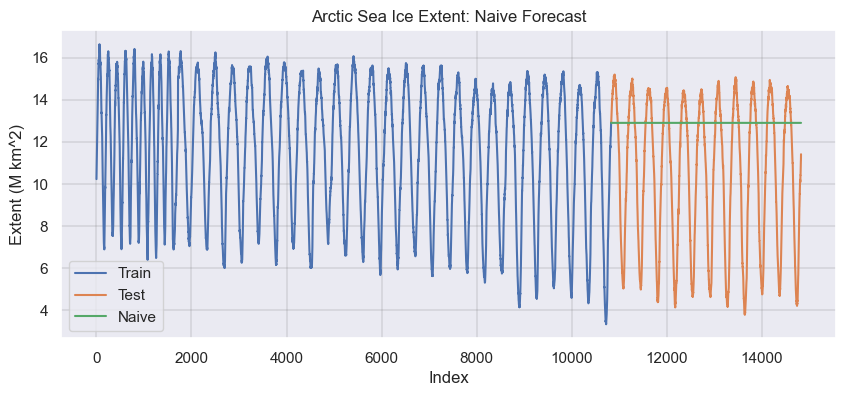

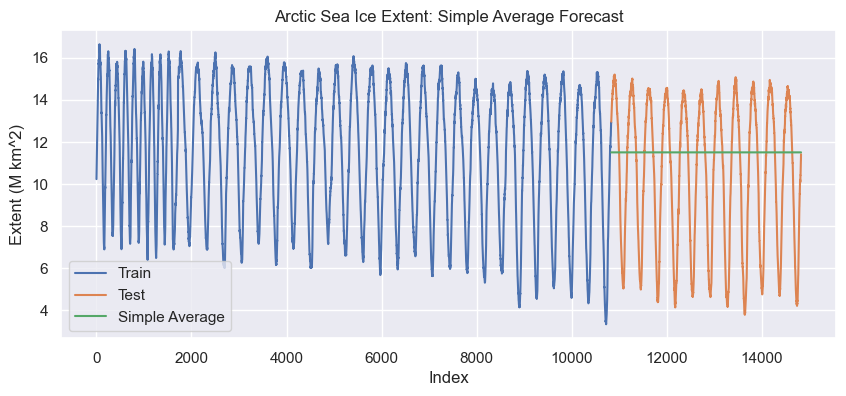

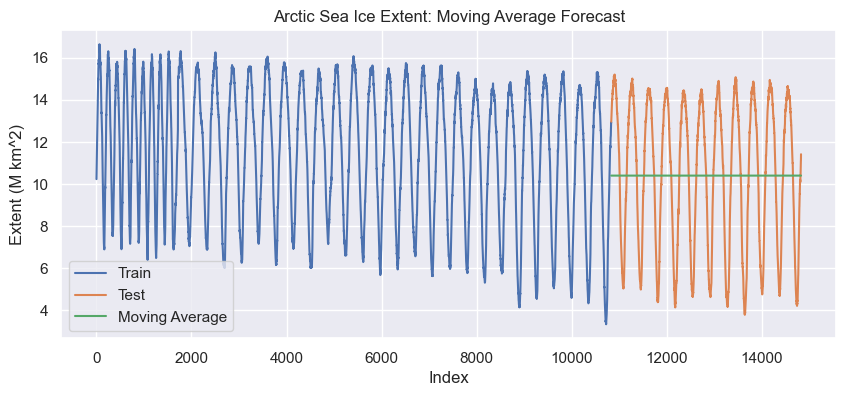

c:\Users\Bryan\anaconda3\envs\seaiceextent\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


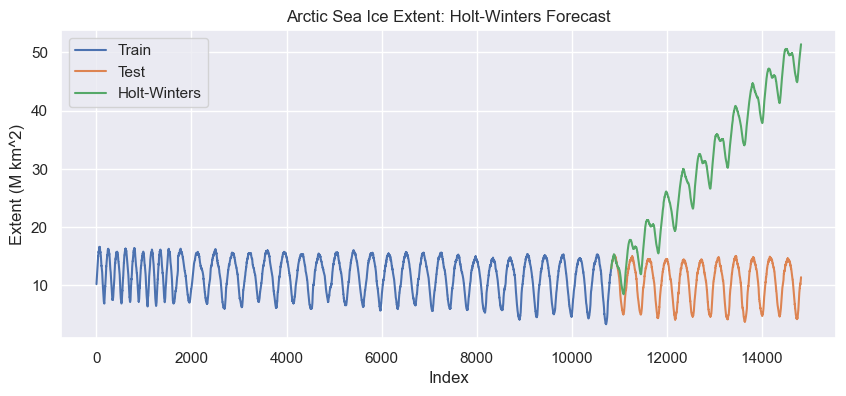

In [12]:
""" Create Naive, Simple Average, Moving Average, and Holt-Winters Forecasts """
try:
    y_hat = forecast(train_nfc, test_nfc)
except NameError:
    print('----------------------')
    print('df is not defined')
    print('----------------------') 

### SARIMA

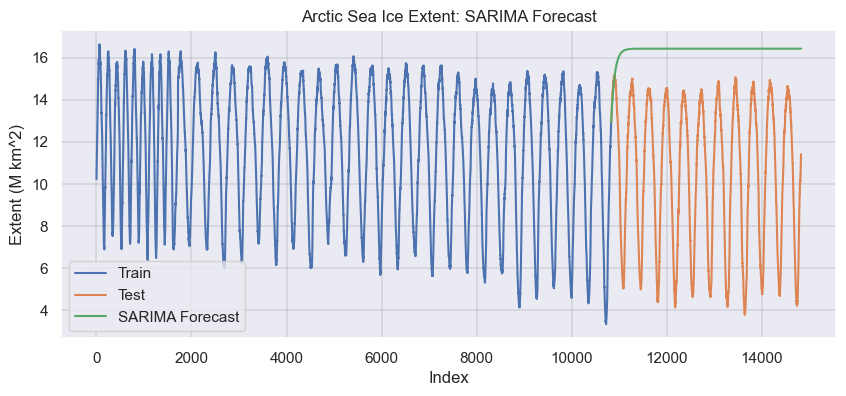

In [13]:
""" Run SARIMA forecasting model """
y_hat = sarima(train_nfc, test_nfc, y_hat)

## Summary Report

In [18]:
""" Print Evaluation Metric Summary """
metric_report(y_hat)

           Method    MAPE   RMSE   Forecast
0  Naive Forecast   48.67   4.24  12.902000
1  Simple Average   41.75   3.62  11.501372
2  Moving Average   38.29   3.46  10.398025
3    Holt-Winters  234.24  23.43        NaN
4          SARIMA   81.84   6.88        NaN
